# Drawing Graphs

NetworkX uses *matplotlib* to produce network graphics that are highly configurable.
Let's start with the usual random graph:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

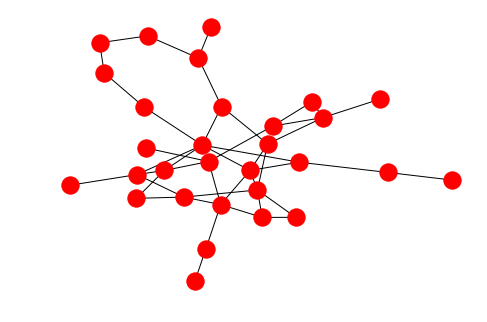

In [61]:
G=nx.gnp_random_graph(30,0.1)

#as we have seen in the lectures before, drwaing graphs is easy:

nx.draw(G)

but...is this representation useful? 

Are there other representation?

Do we have access to the main information about nodes and edges?

The answer is...**YES**

NetworkX provides the user with powerful and highly configurable tools for the visualisation of graphs



### First of all you can draw nodes only.

    draw_networkx_nodes(G, pos, nodelist=None, node_size=300, node_color='r', node_shape='o', alpha=1.0, cmap=None, vmin=None, vmax=None, ax=None, linewidths=None, label=None, **kwds)

Parameters:	
**G** (graph) – A networkx graph  
****pos** (dictionary) – A dictionary with nodes as keys and positions as values. Positions should be sequences of length 2  
**vax** (Matplotlib Axes object, optional) – Draw the graph in the specified Matplotlib axes  
**nodelist** (list, optional) – Draw only specified nodes (default G.nodes())  
**node_size** (scalar or array) – Size of nodes (default=300). If an array is specified it must be the same length as nodelist  
**node_color** (color string, or array of floats) – Node color. Can be a single color format string (default=’r’), or a sequence of colors with the same length as nodelist. If numeric values are specified they will be mapped to colors using the cmap and vmin,vmax parameters. See matplotlib.scatter for more details  
**node_shape** (string) – The shape of the node. Specification is as matplotlib.scatter marker, one of ‘so^>v<dph8’ (default=’o’)  
**alpha** (float) – The node transparency (default=1.0)   
**cmap** (Matplotlib colormap) – Colormap for mapping intensities of nodes (default=None)  
**vmin,vmax** (floats) – Minimum and maximum for node colormap scaling (default=None)    
**linewidths** ([None | scalar | sequence]) – Line width of symbol border (default =1.0)    
**label** ([None| string]) – Label for legend  


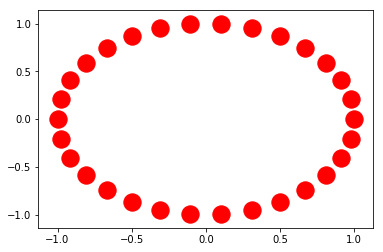

In [49]:
#You need a graph and a set of positions, given in the form of a dictionary.
# two options: 
# 1)use predefined positions
# 2)define them for yourself 

pos=nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos)

There are different positioning options for nodes, just **test it for yourself**

**circular_layout**(G[, dim, scale, center])	Position nodes on a circle  
**random_layout**(G[, dim, center])	Position nodes uniformly at random in the unit square  
**shell_layout**(G[, nlist, dim, scale, center])	Position nodes in concentric circles  
**spring_layout**(G[, dim, k, pos, fixed, ...])	Position nodes using Fruchterman-Reingold force-directed algorithm  
**spectral_layout**(G[, dim, weight, scale, center])	Position nodes using the eigenvectors of the graph Laplacian  

### Drawing edges works in a similar way:

    draw_networkx_edges(G, pos, edgelist=None, width=1.0, edge_color='k', style='solid', alpha=1.0, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, **kwds)

Parameters:	
**G** (graph) – A networkx graph  
**pos** (dictionary) – A dictionary with nodes as keys and positions as values. Positions should be sequences of length 2  
**edgelist** (collection of edge tuples) – Draw only specified edges(default=G.edges())  
**width** (float, or array of floats) – Line width of edges (default=1.0)  
**edge_color** (color string, or array of floats) – Edge color. Can be a single color format string (default=’r’), or a sequence of colors with the same length as edgelist. If numeric values are specified they will be mapped to colors using the edge_cmap and edge_vmin,edge_vmax parameters  
**style** (string) – Edge line style (default=’solid’) (solid|dashed|dotted,dashdot)  
**alpha** (float) – The edge transparency (default=1.0)  
**cmap** (edge) – Colormap for mapping intensities of edges (default=None)  
**edge_vmin,edge_vmax** (floats) – Minimum and maximum for edge colormap scaling (default=None)  
**ax** (Matplotlib Axes object, optional) – Draw the graph in the specified Matplotlib axes  
**arrows** (bool, optional (default=True)) – For directed graphs, if True draw arrowheads  
**label** ([None| string]) – Label for legend  


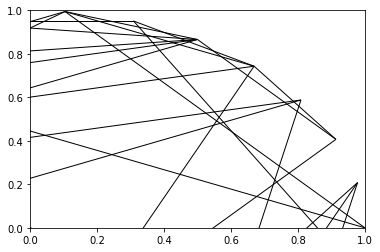

In [15]:
nx.draw_networkx_edges(G,pos)

Of course you can also plot labels, both of nodes and edges. Let's include weights and nodes labels

In [76]:
# let's label nodes with their contrality value:
bb = nx.betweenness_centrality(G)  # this is a dictionary
nx.set_node_attributes(G, bb, 'betweenness')
G.node[1]

{'betweenness': 0.15701970443349753}

{0: Text(1,1.68218e-08,u'0.201765188834'),
 1: Text(0.978148,0.207912,u'0.157019704433'),
 2: Text(0.913545,0.406737,u'0.00985221674877'),
 3: Text(0.809017,0.587785,u'0.0'),
 4: Text(0.669131,0.743145,u'0.0644499178982'),
 5: Text(0.5,0.866025,u'0.144909688013'),
 6: Text(0.309017,0.951057,u'0.0'),
 7: Text(0.104528,0.994522,u'0.0'),
 8: Text(-0.104529,0.994522,u'0.206486042693'),
 9: Text(-0.309017,0.951056,u'0.0'),
 10: Text(-0.5,0.866025,u'0.333538587849'),
 11: Text(-0.669131,0.743145,u'0.0'),
 12: Text(-0.809017,0.587785,u'0.133004926108'),
 13: Text(-0.913545,0.406737,u'0.0266830870279'),
 14: Text(-0.978148,0.207912,u'0.00266830870279'),
 15: Text(-1,-7.06009e-08,u'0.0888752052545'),
 16: Text(-0.978148,-0.207912,u'0.113095238095'),
 17: Text(-0.913545,-0.406737,u'0.0'),
 18: Text(-0.809017,-0.587785,u'0.0689655172414'),
 19: Text(-0.669131,-0.743145,u'0.0'),
 20: Text(-0.5,-0.866025,u'0.0'),
 21: Text(-0.309017,-0.951056,u'0.0472085385878'),
 22: Text(-0.104528,-0.994522,u'0.2

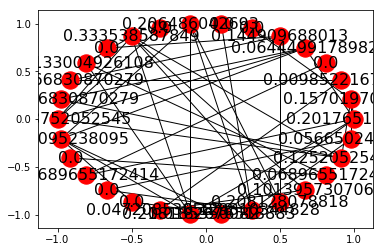

In [92]:
nx.draw_networkx_nodes(G, pos,label='aaa')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G,pos,bb,font_size=16)

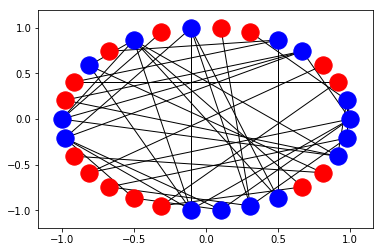

In [130]:
#ok, this is not very practical...let's colour nodes according to centrality values

#first we select all the nodes whose bb is < 0.2 and we plot them in red
nodes=list(G.nodes())
G_red=[ (p) for (p) in nodes if nx.degree_centrality(G)[p] <0.1]
#then we select all the nodes whese bb >=0.2, and we plot them in blue
G_blue=[ (p) for (p) in nodes if nx.degree_centrality(G)[p] >=0.1]

#Now we can plot the nodes separately:
nx.draw_networkx_nodes(G_red, pos,node_color='r')
nx.draw_networkx_nodes(G_blue, pos,node_color='b')
nx.draw_networkx_edges(G, pos)


## Manual positioning of nodes

NetworkX offers the possibility to manually position nodes and edges in a two dimensional space. To do this the position list *pos* maus be inserted manually.

In [141]:
pos={}

L=len(G.nodes()) 
in_y=10.
in_step=100

for in_n in G:
        pos[in_n]=(100.,in_y) #(x_position,y_position)
        in_y=in_y+in_step

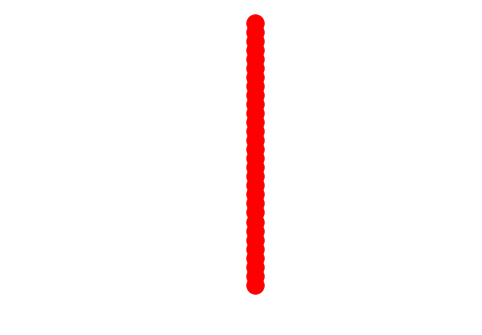

In [135]:
nx.draw(G,pos)

ok...not very useful...
What about putting on the left the nodes with betweenness centrality $B_c<0.1$ and on the rigth those with $B_c>0.1$? 

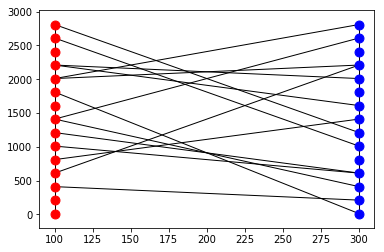

In [148]:
# First we need to select the nodes
G_left=[ (p) for (p) in nodes if nx.degree_centrality(G)[p] <0.1]
G_right=[ (p) for (p) in nodes if nx.degree_centrality(G)[p] >=0.1]

L_l=len(G_left)
in_y=10.
in_step=200

for in_n in G_left:
    pos[in_n]=(100.,in_y)
    in_y=in_y+in_step


L_r=len(G_right)
in_y=10.
in_step=200

for in_n in G_right:
    pos[in_n]=(300.,in_y) 
    in_y=in_y+in_step
        
nx.draw_networkx_nodes(G, pos, G_left, node_color='r',node_size=80)
nx.draw_networkx_nodes(G, pos, G_right, node_color='b',node_size=80)
nx.draw_networkx_edges(G,pos)